# Proyecto - PlusTI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Análisis exploratorio de datos

In [2]:
# Cargar el dataset
df = pd.read_csv("dataset_feature_engineering.csv")
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [4]:
# Verificar valores nulos
df.isnull().sum()

cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

In [5]:
# Recuento de clases
print("Recuento de clases:")
print(df['is_fraud'].value_counts())

# Porcentaje de clases
print("\nPorcentaje de clases:")
print(df['is_fraud'].value_counts(normalize=True) * 100)

Recuento de clases:
is_fraud
0    1842743
1       9651
Name: count, dtype: int64

Porcentaje de clases:
is_fraud
0    99.478999
1     0.521001
Name: proportion, dtype: float64


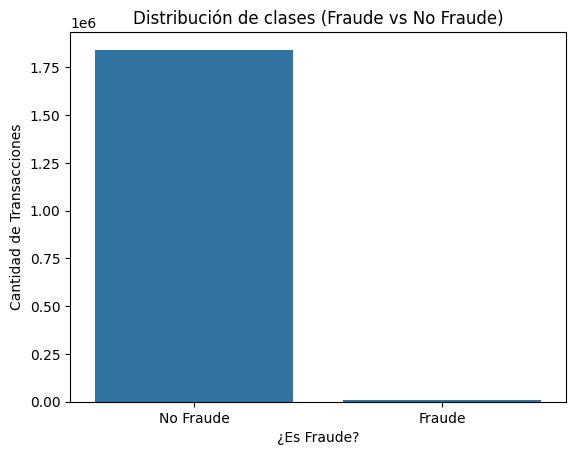

In [6]:
# Visualización
sns.countplot(data=df, x='is_fraud')
plt.title('Distribución de clases (Fraude vs No Fraude)')
plt.xlabel('¿Es Fraude?')
plt.ylabel('Cantidad de Transacciones')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

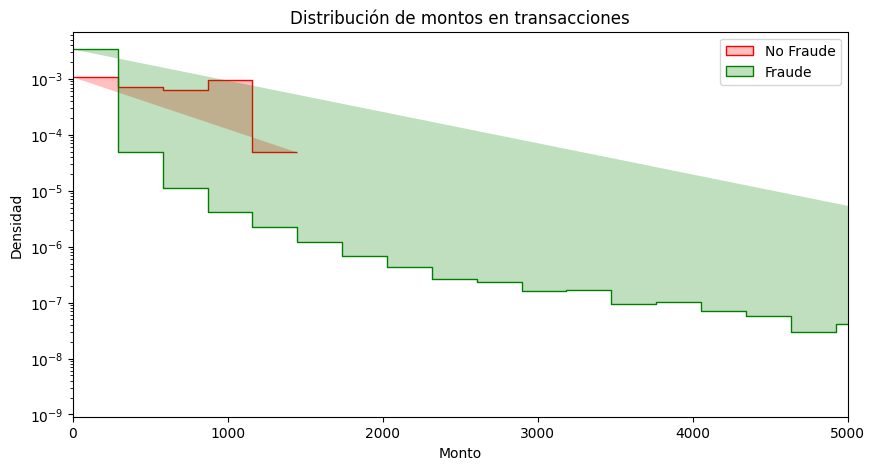

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amt', bins=100, hue='is_fraud', log_scale=(False, True), palette=['green', 'red'], element='step', stat='density', common_norm=False)
plt.title('Distribución de montos en transacciones')
plt.xlabel('Monto')
plt.ylabel('Densidad')
plt.xlim(0, 5000)
plt.legend(labels=['No Fraude', 'Fraude'])
plt.show()

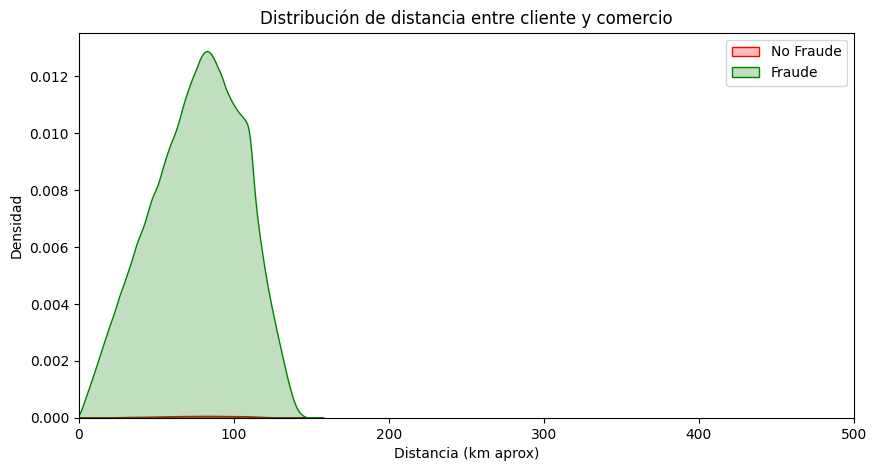

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='dist_between_client_and_merch', hue='is_fraud', fill=True, palette=['green', 'red'])
plt.title('Distribución de distancia entre cliente y comercio')
plt.xlabel('Distancia (km aprox)')
plt.ylabel('Densidad')
plt.legend(labels=['No Fraude', 'Fraude'])
plt.xlim(0, 500)
plt.show()

C:\Users\50242\AppData\Local\Temp\ipykernel_18776\1601078828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')


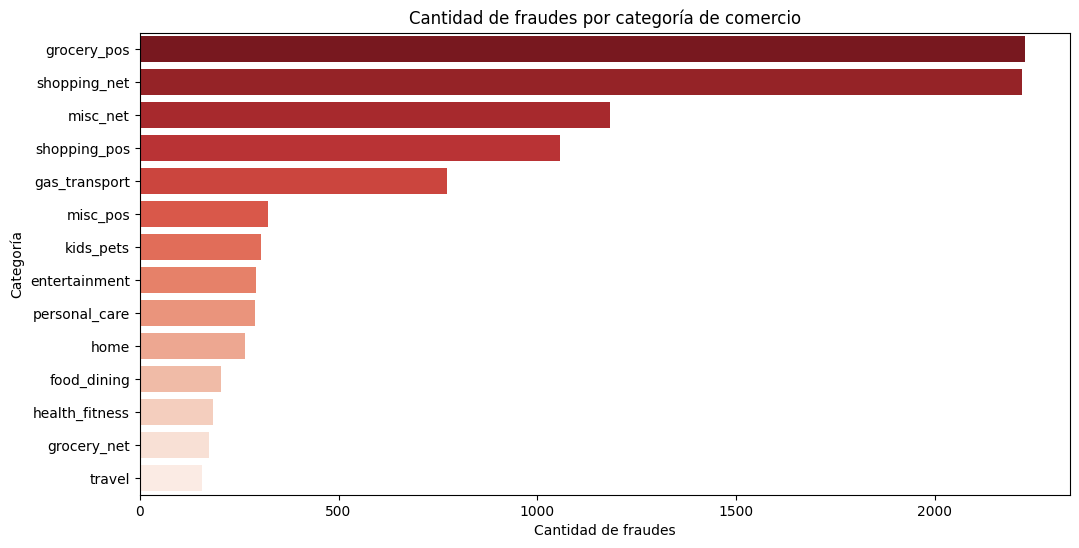

In [9]:
fraude_por_categoria = df[df['is_fraud'] == 1]['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')
plt.title('Cantidad de fraudes por categoría de comercio')
plt.xlabel('Cantidad de fraudes')
plt.ylabel('Categoría')
plt.show()

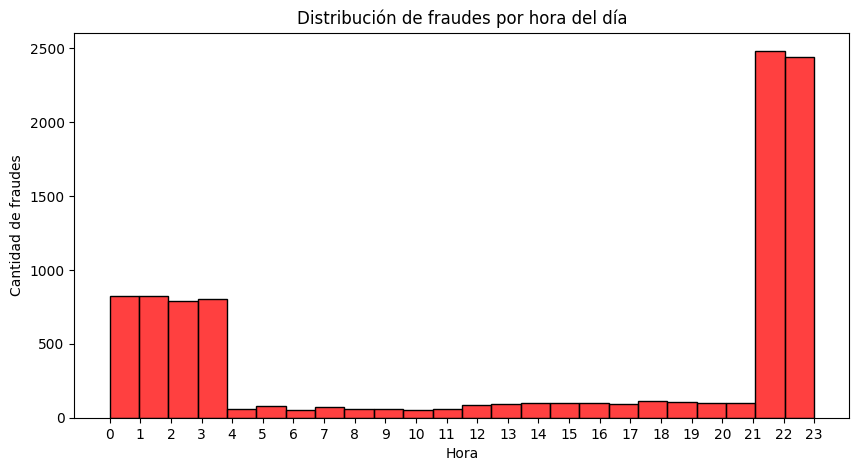

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['is_fraud'] == 1], x='hour', bins=24, color='red', kde=False)
plt.title('Distribución de fraudes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de fraudes')
plt.xticks(range(0, 24))
plt.show()

## Ingeniería de variables

In [11]:
# Convertir unix_time a datetime para las fechas
df['transaction_date'] = pd.to_datetime(df['unix_time'], unit='s')

# Identificar la primera transacción registrada para cada comercio
first_transaction_by_merchant = df.groupby('merchant')['transaction_date'].min().reset_index()
first_transaction_by_merchant.rename(columns={'transaction_date': 'first_transaction_date'}, inplace=True)

# Unir esta información al dataframe original
df = df.merge(first_transaction_by_merchant, on='merchant', how='left')

In [12]:
# Calcular días desde la primera transacción del comercio
df['merchant_age_days'] = (df['transaction_date'] - df['first_transaction_date']).dt.days

In [13]:
# Crear una variable booleana que indique si el comercio es nuevo
df['is_new_merchant'] = df['merchant_age_days'] < 30

In [14]:
# Calcular la cantidad de comercios nuevos
new_merchants_count = df['is_new_merchant'].value_counts()
print("\nCantidad de comercios nuevos:")
print(new_merchants_count)


Cantidad de comercios nuevos:
is_new_merchant
False    1800758
True       51636
Name: count, dtype: int64


In [15]:
# Número de fraudes históricos por comercio
fraudes_por_merchant = df.groupby('merchant')['is_fraud'].sum().reset_index()
fraudes_por_merchant.rename(columns={'is_fraud': 'merchant_total_fraudes'}, inplace=True)

# Unir al dataset
df = df.merge(fraudes_por_merchant, on='merchant', how='left')

In [16]:
# Número total de transacciones por comercio
transacciones_por_merchant = df.groupby('merchant').size().reset_index(name='merchant_total_transacciones')

# Unir al dataset
df = df.merge(transacciones_por_merchant, on='merchant', how='left')

# Calcular tasa
df['merchant_fraud_rate'] = df['merchant_total_fraudes'] / df['merchant_total_transacciones']

In [17]:
# Monto de la primera transacción del comercio
primer_monto = df.sort_values('transaction_date').groupby('merchant').first().reset_index()
primer_monto = primer_monto[['merchant', 'amt']]
primer_monto.rename(columns={'amt': 'first_transaction_amt'}, inplace=True)

df = df.merge(primer_monto, on='merchant', how='left')

In [18]:
# Desviación estándar de los montos en los primeros 10 días del comercio
primeros_dias = df[df['merchant_age_days'] <= 10]
variabilidad = primeros_dias.groupby('merchant')['amt'].std().reset_index()
variabilidad.rename(columns={'amt': 'std_amt_first_10_days'}, inplace=True)

df = df.merge(variabilidad, on='merchant', how='left')

In [19]:
# Promedio de distancia en los primeros 10 días del comercio
avg_distancia = primeros_dias.groupby('merchant')['dist_between_client_and_merch'].mean().reset_index()
avg_distancia.rename(columns={'dist_between_client_and_merch': 'avg_distancia_first_10_days'}, inplace=True)

df = df.merge(avg_distancia, on='merchant', how='left')

In [20]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,transaction_date,first_transaction_date,merchant_age_days,is_new_merchant,merchant_total_fraudes,merchant_total_transacciones,merchant_fraud_rate,first_transaction_amt,std_amt_first_10_days,avg_distancia_first_10_days
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2012-01-01 00:00:18,2012-01-01 00:00:18,0,True,24,1768,0.013575,4.97,238.345394,72.003855
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2012-01-01 00:00:44,2012-01-01 00:00:44,0,True,35,3528,0.009921,107.23,57.579585,78.709902
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2012-01-01 00:00:51,2012-01-01 00:00:51,0,True,5,2642,0.001893,220.11,90.733688,77.500225
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2012-01-01 00:01:16,2012-01-01 00:01:16,0,True,9,3725,0.002416,45.00,13.135232,90.403195
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2012-01-01 00:03:06,2012-01-01 00:03:06,0,True,7,2290,0.003057,41.96,101.405982,81.247194


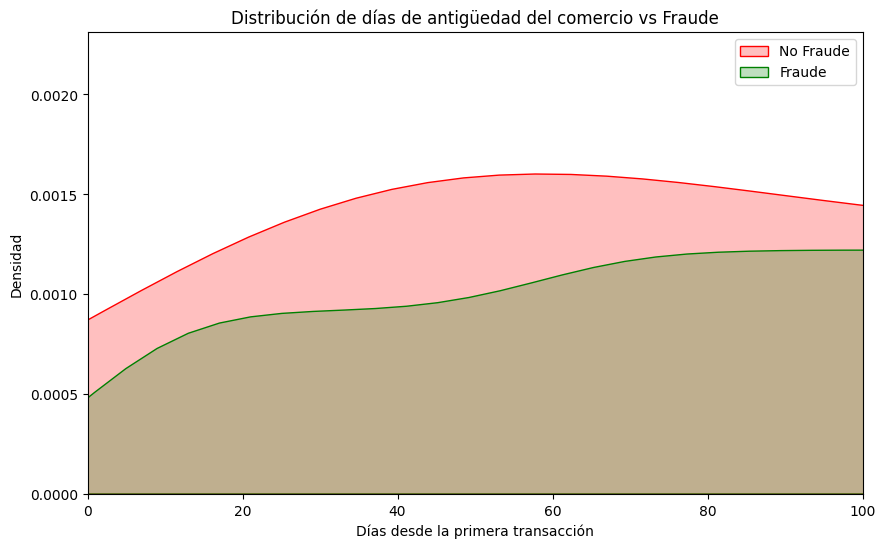

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='merchant_age_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Distribución de días de antigüedad del comercio vs Fraude')
plt.xlabel('Días desde la primera transacción')
plt.ylabel('Densidad')
plt.legend(labels=['No Fraude', 'Fraude'])
plt.xlim(0, 100)
plt.show()

C:\Users\50242\AppData\Local\Temp\ipykernel_18776\2916766333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='is_new_merchant', y='is_fraud', estimator=np.mean, palette=['green', 'red'])


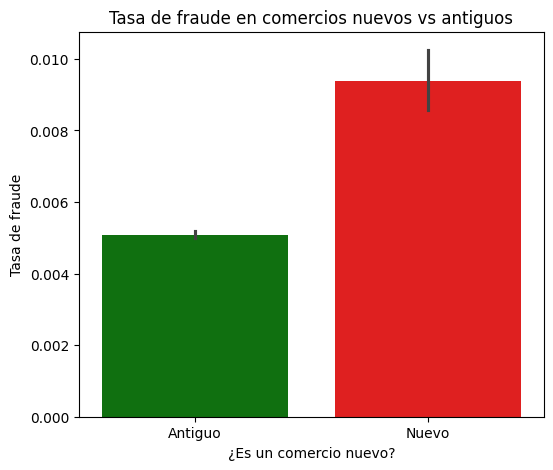

In [22]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='is_new_merchant', y='is_fraud', estimator=np.mean, palette=['green', 'red'])
plt.title('Tasa de fraude en comercios nuevos vs antiguos')
plt.xlabel('¿Es un comercio nuevo?')
plt.ylabel('Tasa de fraude')
plt.xticks([0,1], ['Antiguo', 'Nuevo'])
plt.show()

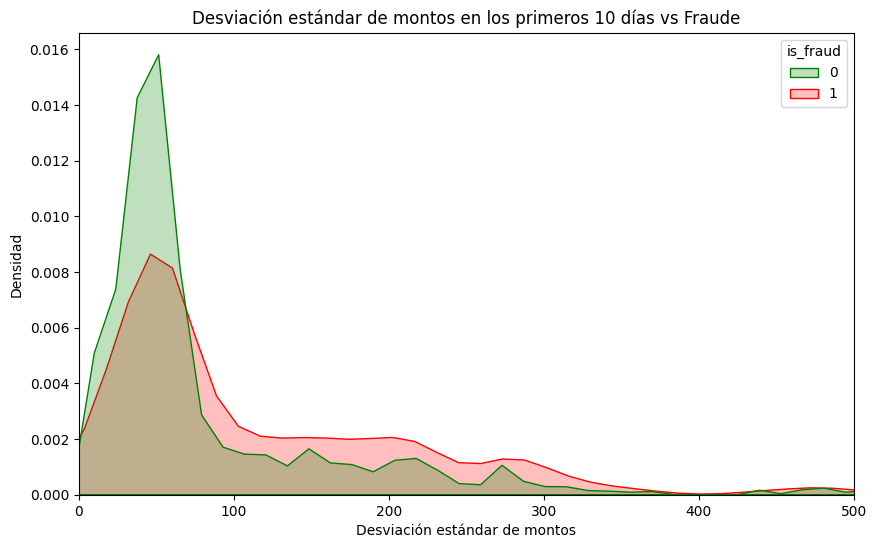

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='std_amt_first_10_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Desviación estándar de montos en los primeros 10 días vs Fraude')
plt.xlabel('Desviación estándar de montos')
plt.ylabel('Densidad')
plt.xlim(0, 500)
plt.show()

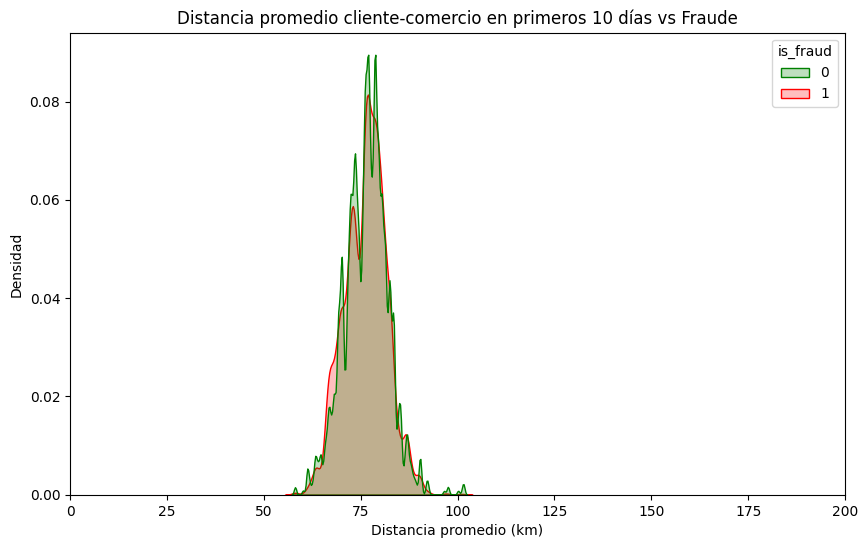

In [24]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='avg_distancia_first_10_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Distancia promedio cliente-comercio en primeros 10 días vs Fraude')
plt.xlabel('Distancia promedio (km)')
plt.ylabel('Densidad')
plt.xlim(0, 200)
plt.show()

## Implementación del modelo base

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier, plot_importance
from lightgbm import early_stopping, log_evaluation

In [26]:
df_modelo = df.copy()

# Convertir 'dob' a edad
df_modelo['dob'] = pd.to_datetime(df_modelo['dob'], errors='coerce')
df_modelo['edad'] = (pd.to_datetime('today') - df_modelo['dob']).dt.days // 365
df_modelo.drop(columns='dob', inplace=True)

# Codificar 'category' y 'job'
le_category = LabelEncoder()
le_job = LabelEncoder()

df_modelo['category'] = le_category.fit_transform(df_modelo['category'].astype(str))
df_modelo['job'] = le_job.fit_transform(df_modelo['job'].astype(str))

In [27]:
# Eliminar columnas no numéricas o irrelevantes
columnas_eliminar = [
    'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'trans_num', 'unix_time', 'transaction_date', 
    'first_transaction_date', 'merchant'
]

df_modelo['transaction_date'] = pd.to_datetime(df_modelo['transaction_date'])
df_modelo['mes_anio'] = df_modelo['transaction_date'].dt.to_period('M')
train_data = df_modelo[df_modelo['mes_anio'] < '2013-12']
test_data = df_modelo[df_modelo['mes_anio'] == '2013-12']

X_train = train_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_train = train_data['is_fraud']
X_test = test_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_test = test_data['is_fraud']

In [28]:
# Inicializar el modelo
modelo_lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_estimators=1000
)

In [29]:
# Entrenar el modelo con callbacks
modelo_lgbm.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

[LightGBM] [Info] Number of positive: 9393, number of negative: 1703463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.149382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4606
[LightGBM] [Info] Number of data points in the train set: 1712856, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005484 -> initscore=-5.200454
[LightGBM] [Info] Start training from score -5.200454
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	training's auc: 0.860623	training's binary_logloss: 0.0167334	valid_1's auc: 0.859279	valid_1's binary_logloss: 0.0101634


LGBMClassifier(n_estimators=1000, objective='binary', random_state=42)

In [30]:
# Predicciones
y_pred_proba = modelo_lgbm.predict_proba(X_test)[:, 1]
y_pred = modelo_lgbm.predict(X_test)

In [31]:
# Métricas generales
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9994    0.9996    0.9995    139280
           1     0.7602    0.6512    0.7015       258

    accuracy                         0.9990    139538
   macro avg     0.8798    0.8254    0.8505    139538
weighted avg     0.9989    0.9990    0.9989    139538

Confusion Matrix:
[[139227     53]
 [    90    168]]
AUC-ROC: 0.8593
F1 Score: 0.7015


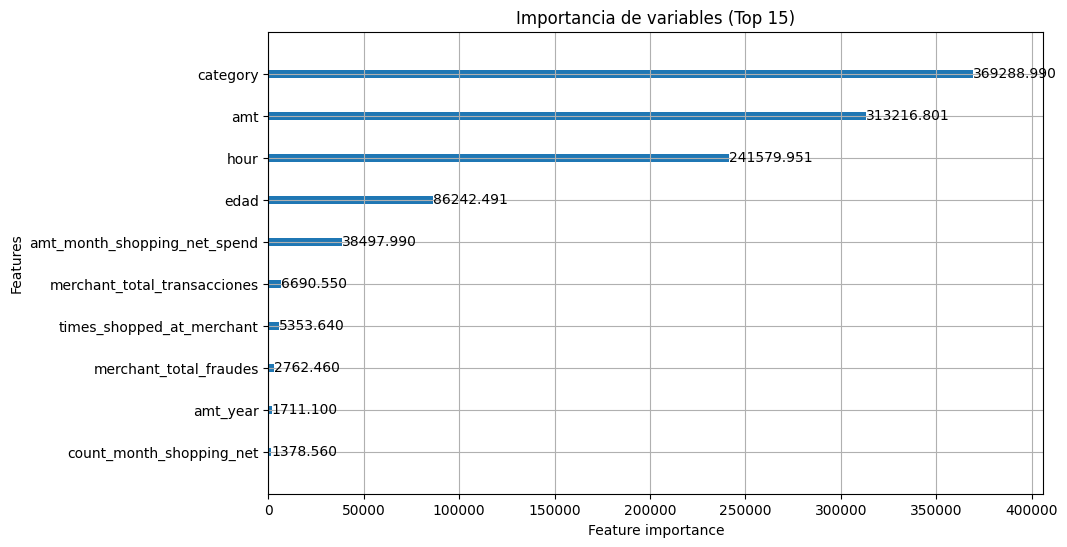

In [32]:
# Importancia de variables
plot_importance(modelo_lgbm, max_num_features=15, importance_type='gain', figsize=(10,6))
plt.title('Importancia de variables (Top 15)')
plt.show()

## Definición de métricas personalizadas

In [33]:
import lightgbm as lgb
import optuna
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
df_modelo['transaction_date'] = pd.to_datetime(df_modelo['transaction_date'])
df_modelo['mes_anio'] = df_modelo['transaction_date'].dt.to_period('M')

train_data = df_modelo[df_modelo['mes_anio'] < '2013-12']
test_data = df_modelo[df_modelo['mes_anio'] == '2013-12']

X_train_full = train_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_train_full = train_data['is_fraud']
X_test = test_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_test = test_data['is_fraud']

# División interna para validación durante búsqueda de hiperparámetros
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [35]:
def false_positive_penalty_ratio(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)

    TP = ((y_pred_binary == 1) & (y_true == 1)).sum()
    FP = ((y_pred_binary == 1) & (y_true == 0)).sum()
    
    if TP == 0:
        metric_value = float('inf')
    else:
        metric_value = (TP + FP) / TP
    
    return 'false_positive_penalty_ratio', metric_value, False

In [36]:
def balanced_metric(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)

    TP = ((y_pred_binary == 1) & (y_true == 1)).sum()
    FP = ((y_pred_binary == 1) & (y_true == 0)).sum()
    FN = ((y_pred_binary == 0) & (y_true == 1)).sum()

    if TP == 0:
        return 'balanced_fp_penalty', float('inf'), False

    precision_penalty = (TP + FP) / TP
    recall = TP / (TP + FN + 1e-15)

    metric_value = precision_penalty + (1 - recall)
    return 'balanced_fp_penalty', metric_value, False

In [37]:
def evaluar_modelo(nombre, modelo, X_test, y_test, threshold=0.5):
    y_pred_proba = modelo.predict(X_test)
    y_pred = (y_pred_proba >= threshold).astype(int)

    print(f"\n--- Evaluación: {nombre} ---")
    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Umbral usado:", threshold)

In [38]:
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'None',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'verbosity': -1,
        'random_state': 42
    }

    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)

    model = lgb.train(
        param,
        dtrain,
        valid_sets=[dvalid],
        valid_names=['valid'],
        feval=false_positive_penalty_ratio,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)
        ]
    )

    y_pred = model.predict(X_valid)
    y_pred_binary = (y_pred > 0.5).astype(int)

    return f1_score(y_valid, y_pred_binary)

In [39]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print('Mejores parámetros encontrados:', study.best_params)

[I 2025-05-30 13:54:27,061] A new study created in memory with name: no-name-458ae4e6-325d-4602-88dc-9b3ca5286044


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid's false_positive_penalty_ratio: inf


[I 2025-05-30 13:54:32,928] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.009255652156836353, 'num_leaves': 77, 'max_depth': 5, 'min_child_samples': 53, 'scale_pos_weight': 94.99225363404662, 'feature_fraction': 0.8869107799619614, 'bagging_fraction': 0.9361471791000783, 'bagging_freq': 10, 'reg_alpha': 0.7063367606867296, 'reg_lambda': 0.20262580368311722}. Best is trial 0 with value: 0.0.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid's false_positive_penalty_ratio: 1.18772


[I 2025-05-30 13:54:37,864] Trial 1 finished with value: 0.5871750433275563 and parameters: {'learning_rate': 0.02922828596635333, 'num_leaves': 70, 'max_depth': 6, 'min_child_samples': 79, 'scale_pos_weight': 27.82705293793205, 'feature_fraction': 0.7358925237331031, 'bagging_fraction': 0.6943718519444275, 'bagging_freq': 10, 'reg_alpha': 0.9972372860467028, 'reg_lambda': 0.7204206299774992}. Best is trial 1 with value: 0.5871750433275563.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid's false_positive_penalty_ratio: 1


[I 2025-05-30 13:54:46,456] Trial 2 finished with value: 0.0010638297872340426 and parameters: {'learning_rate': 0.010583065371112994, 'num_leaves': 99, 'max_depth': 7, 'min_child_samples': 56, 'scale_pos_weight': 54.12971774006674, 'feature_fraction': 0.8623144091314651, 'bagging_fraction': 0.8500645002151002, 'bagging_freq': 7, 'reg_alpha': 0.5884217041889979, 'reg_lambda': 0.2453189761914789}. Best is trial 1 with value: 0.5871750433275563.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid's false_positive_penalty_ratio: 1.146


[I 2025-05-30 13:54:51,629] Trial 3 finished with value: 0.601813110181311 and parameters: {'learning_rate': 0.024377574926007988, 'num_leaves': 50, 'max_depth': 10, 'min_child_samples': 100, 'scale_pos_weight': 57.692516991282766, 'feature_fraction': 0.6345444532909725, 'bagging_fraction': 0.6407294025252795, 'bagging_freq': 8, 'reg_alpha': 0.6426061886175137, 'reg_lambda': 0.24494160998094927}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[31]	valid's false_positive_penalty_ratio: 1


[I 2025-05-30 13:54:58,275] Trial 4 finished with value: 0.0010638297872340426 and parameters: {'learning_rate': 0.015956886788633315, 'num_leaves': 60, 'max_depth': 7, 'min_child_samples': 28, 'scale_pos_weight': 1.0618745427083356, 'feature_fraction': 0.7478168541923659, 'bagging_fraction': 0.8990829771782303, 'bagging_freq': 7, 'reg_alpha': 0.8727327824729364, 'reg_lambda': 0.5899691330820643}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 3.43287
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 3.43287


[I 2025-05-30 13:55:10,519] Trial 5 finished with value: 0.44646188285039173 and parameters: {'learning_rate': 0.04478364699792575, 'num_leaves': 48, 'max_depth': 10, 'min_child_samples': 49, 'scale_pos_weight': 146.0478308126888, 'feature_fraction': 0.7914415839446269, 'bagging_fraction': 0.9058556985667903, 'bagging_freq': 10, 'reg_alpha': 0.7193780361380366, 'reg_lambda': 0.15328749278414555}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	valid's false_positive_penalty_ratio: 1.20388


[I 2025-05-30 13:55:19,809] Trial 6 finished with value: 0.27454464682363394 and parameters: {'learning_rate': 0.024171630949540727, 'num_leaves': 80, 'max_depth': 8, 'min_child_samples': 12, 'scale_pos_weight': 161.20316399158142, 'feature_fraction': 0.8261972619084383, 'bagging_fraction': 0.9396780205980549, 'bagging_freq': 7, 'reg_alpha': 0.6763961558399433, 'reg_lambda': 0.013745330801361866}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[18]	valid's false_positive_penalty_ratio: 1.03226


[I 2025-05-30 13:55:28,323] Trial 7 finished with value: 0.2323185011709602 and parameters: {'learning_rate': 0.022728980661042578, 'num_leaves': 74, 'max_depth': 11, 'min_child_samples': 81, 'scale_pos_weight': 19.436898309899828, 'feature_fraction': 0.9795138725426508, 'bagging_fraction': 0.646593829510014, 'bagging_freq': 9, 'reg_alpha': 0.7621337571364576, 'reg_lambda': 0.9068491185480735}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds


[I 2025-05-30 13:55:32,138] Trial 8 finished with value: 0.0 and parameters: {'learning_rate': 0.007306113384697805, 'num_leaves': 99, 'max_depth': 5, 'min_child_samples': 64, 'scale_pos_weight': 130.9448461148655, 'feature_fraction': 0.8971120636646852, 'bagging_fraction': 0.651019108048686, 'bagging_freq': 1, 'reg_alpha': 0.5879098677001006, 'reg_lambda': 0.833545409730775}. Best is trial 3 with value: 0.601813110181311.


Early stopping, best iteration is:
[1]	valid's false_positive_penalty_ratio: inf
Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 2.82115
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 2.82115


[I 2025-05-30 13:55:41,367] Trial 9 finished with value: 0.515736040609137 and parameters: {'learning_rate': 0.03740498170310134, 'num_leaves': 58, 'max_depth': 11, 'min_child_samples': 95, 'scale_pos_weight': 92.53366581979007, 'feature_fraction': 0.95128531765648, 'bagging_fraction': 0.6295939509964681, 'bagging_freq': 5, 'reg_alpha': 0.6444585589010022, 'reg_lambda': 0.3722708306308319}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[17]	valid's false_positive_penalty_ratio: 4.46771


[I 2025-05-30 13:55:45,648] Trial 10 finished with value: 0.3481244823097858 and parameters: {'learning_rate': 0.03284567730271865, 'num_leaves': 20, 'max_depth': 3, 'min_child_samples': 95, 'scale_pos_weight': 62.41476775857076, 'feature_fraction': 0.6117757916224588, 'bagging_fraction': 0.748562525848149, 'bagging_freq': 4, 'reg_alpha': 0.2737402094011255, 'reg_lambda': 0.47137741032682345}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid's false_positive_penalty_ratio: 2.37335


[I 2025-05-30 13:55:49,877] Trial 11 finished with value: 0.5334895528217145 and parameters: {'learning_rate': 0.03167285219572805, 'num_leaves': 36, 'max_depth': 9, 'min_child_samples': 77, 'scale_pos_weight': 42.821345214766566, 'feature_fraction': 0.6603013297130692, 'bagging_fraction': 0.7374836604014386, 'bagging_freq': 8, 'reg_alpha': 0.9757971670872955, 'reg_lambda': 0.7309282705538132}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid's false_positive_penalty_ratio: 1


[I 2025-05-30 13:55:55,258] Trial 12 finished with value: 0.0010638297872340426 and parameters: {'learning_rate': 0.018931721540860074, 'num_leaves': 42, 'max_depth': 12, 'min_child_samples': 100, 'scale_pos_weight': 30.36383094463525, 'feature_fraction': 0.7123722183313989, 'bagging_fraction': 0.7149729272884723, 'bagging_freq': 9, 'reg_alpha': 0.3546064932009395, 'reg_lambda': 0.6698691098258841}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 5.90061
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 5.90061


[I 2025-05-30 13:56:02,704] Trial 13 finished with value: 0.2882610425785913 and parameters: {'learning_rate': 0.039152286732881986, 'num_leaves': 65, 'max_depth': 5, 'min_child_samples': 79, 'scale_pos_weight': 190.18693602095414, 'feature_fraction': 0.6811487886479378, 'bagging_fraction': 0.6911313796799611, 'bagging_freq': 3, 'reg_alpha': 0.12124918129494955, 'reg_lambda': 0.9871100864413358}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid's false_positive_penalty_ratio: 1.59341


[I 2025-05-30 13:56:07,468] Trial 14 finished with value: 0.08992094861660078 and parameters: {'learning_rate': 0.029618516669482935, 'num_leaves': 32, 'max_depth': 9, 'min_child_samples': 84, 'scale_pos_weight': 66.74588407127989, 'feature_fraction': 0.6058499226081209, 'bagging_fraction': 0.8037271020604115, 'bagging_freq': 8, 'reg_alpha': 0.9997756987105243, 'reg_lambda': 0.41289970785719254}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 3.22597
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 3.22597


[I 2025-05-30 13:56:16,226] Trial 15 finished with value: 0.4670517196114466 and parameters: {'learning_rate': 0.04884068731477264, 'num_leaves': 52, 'max_depth': 6, 'min_child_samples': 67, 'scale_pos_weight': 79.75807344272668, 'feature_fraction': 0.7468378616772177, 'bagging_fraction': 0.606808578719159, 'bagging_freq': 10, 'reg_alpha': 0.4674548149900729, 'reg_lambda': 0.5745495999405656}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid's false_positive_penalty_ratio: 1.32197


[I 2025-05-30 13:56:22,218] Trial 16 finished with value: 0.5413533834586466 and parameters: {'learning_rate': 0.025479066859913094, 'num_leaves': 71, 'max_depth': 9, 'min_child_samples': 89, 'scale_pos_weight': 120.19527027154749, 'feature_fraction': 0.6693198760087056, 'bagging_fraction': 0.7780029538977863, 'bagging_freq': 6, 'reg_alpha': 0.8631633675785506, 'reg_lambda': 0.33524120184443706}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[26]	valid's false_positive_penalty_ratio: 1


[I 2025-05-30 13:56:27,351] Trial 17 finished with value: 0.03143006809848088 and parameters: {'learning_rate': 0.017010134526091618, 'num_leaves': 87, 'max_depth': 3, 'min_child_samples': 71, 'scale_pos_weight': 5.004891985889223, 'feature_fraction': 0.7668151927386064, 'bagging_fraction': 0.6798349459264292, 'bagging_freq': 9, 'reg_alpha': 0.43124621767671656, 'reg_lambda': 0.041763516026969705}. Best is trial 3 with value: 0.601813110181311.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.91049
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.91049


[I 2025-05-30 13:56:38,864] Trial 18 finished with value: 0.6707456978967495 and parameters: {'learning_rate': 0.036920989767517676, 'num_leaves': 87, 'max_depth': 8, 'min_child_samples': 39, 'scale_pos_weight': 33.21033981527158, 'feature_fraction': 0.709953975294744, 'bagging_fraction': 0.817804143129867, 'bagging_freq': 8, 'reg_alpha': 0.04244784662912848, 'reg_lambda': 0.7411985001776846}. Best is trial 18 with value: 0.6707456978967495.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.96016
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.96016


[I 2025-05-30 13:56:51,703] Trial 19 finished with value: 0.6601540484689085 and parameters: {'learning_rate': 0.03766189278741868, 'num_leaves': 88, 'max_depth': 10, 'min_child_samples': 35, 'scale_pos_weight': 44.649922501591924, 'feature_fraction': 0.6356901868422852, 'bagging_fraction': 0.9951701579468759, 'bagging_freq': 6, 'reg_alpha': 0.025175479239865073, 'reg_lambda': 0.8013513274101574}. Best is trial 18 with value: 0.6707456978967495.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 3.07551
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 3.07551


[I 2025-05-30 13:57:04,420] Trial 20 finished with value: 0.48557562685359934 and parameters: {'learning_rate': 0.03865084207306237, 'num_leaves': 86, 'max_depth': 8, 'min_child_samples': 38, 'scale_pos_weight': 111.76496036809817, 'feature_fraction': 0.7013847594102623, 'bagging_fraction': 0.986290139477902, 'bagging_freq': 5, 'reg_alpha': 0.017324368378241358, 'reg_lambda': 0.8187672709905884}. Best is trial 18 with value: 0.6707456978967495.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.93657
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.93657


[I 2025-05-30 13:57:15,387] Trial 21 finished with value: 0.6643887623386484 and parameters: {'learning_rate': 0.03497130641393402, 'num_leaves': 90, 'max_depth': 10, 'min_child_samples': 32, 'scale_pos_weight': 42.10742593774332, 'feature_fraction': 0.6406664437998126, 'bagging_fraction': 0.8276877435702472, 'bagging_freq': 6, 'reg_alpha': 0.20257108220245645, 'reg_lambda': 0.5886768623422048}. Best is trial 18 with value: 0.6707456978967495.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.86304
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.86304


[I 2025-05-30 13:57:26,462] Trial 22 finished with value: 0.6803118908382066 and parameters: {'learning_rate': 0.04251130398938506, 'num_leaves': 91, 'max_depth': 10, 'min_child_samples': 29, 'scale_pos_weight': 40.74025024345423, 'feature_fraction': 0.6331779157841706, 'bagging_fraction': 0.8308000162680262, 'bagging_freq': 6, 'reg_alpha': 0.17461781183912573, 'reg_lambda': 0.5932611322020396}. Best is trial 22 with value: 0.6803118908382066.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 2.0655
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 2.0655


[I 2025-05-30 13:57:37,764] Trial 23 finished with value: 0.6396965865992414 and parameters: {'learning_rate': 0.043062686642430056, 'num_leaves': 93, 'max_depth': 12, 'min_child_samples': 20, 'scale_pos_weight': 76.11029232632586, 'feature_fraction': 0.6411722148450429, 'bagging_fraction': 0.8276036012875057, 'bagging_freq': 4, 'reg_alpha': 0.1804813948315811, 'reg_lambda': 0.5629388785021308}. Best is trial 22 with value: 0.6803118908382066.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[2]	valid's false_positive_penalty_ratio: 1.54813


[I 2025-05-30 13:57:43,230] Trial 24 finished with value: 0.6901338621715419 and parameters: {'learning_rate': 0.035008397192911295, 'num_leaves': 81, 'max_depth': 11, 'min_child_samples': 41, 'scale_pos_weight': 15.223469948436716, 'feature_fraction': 0.7005913601714826, 'bagging_fraction': 0.8400660432689651, 'bagging_freq': 6, 'reg_alpha': 0.18393315834708074, 'reg_lambda': 0.6763278711347187}. Best is trial 24 with value: 0.6901338621715419.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.54551
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.54551


[I 2025-05-30 13:57:53,614] Trial 25 finished with value: 0.7550432276657061 and parameters: {'learning_rate': 0.04254697252120793, 'num_leaves': 81, 'max_depth': 12, 'min_child_samples': 42, 'scale_pos_weight': 15.248910605958303, 'feature_fraction': 0.7242109090019921, 'bagging_fraction': 0.8653652776743646, 'bagging_freq': 4, 'reg_alpha': 0.105038554548009, 'reg_lambda': 0.6661905972858195}. Best is trial 25 with value: 0.7550432276657061.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.51501
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.51501


[I 2025-05-30 13:58:04,247] Trial 26 finished with value: 0.7630810689422861 and parameters: {'learning_rate': 0.042977297548838375, 'num_leaves': 81, 'max_depth': 11, 'min_child_samples': 45, 'scale_pos_weight': 13.95601526384277, 'feature_fraction': 0.6964927949845805, 'bagging_fraction': 0.8656862348818221, 'bagging_freq': 2, 'reg_alpha': 0.29015304030286787, 'reg_lambda': 0.482041772309615}. Best is trial 26 with value: 0.7630810689422861.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.52342
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.52342


[I 2025-05-30 13:58:15,362] Trial 27 finished with value: 0.7623298370899353 and parameters: {'learning_rate': 0.049198540647644715, 'num_leaves': 81, 'max_depth': 12, 'min_child_samples': 46, 'scale_pos_weight': 15.954501860324184, 'feature_fraction': 0.7912562520076095, 'bagging_fraction': 0.8801620653827738, 'bagging_freq': 2, 'reg_alpha': 0.3214825633515831, 'reg_lambda': 0.6622957919055511}. Best is trial 26 with value: 0.7630810689422861.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.51934
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.51934


[I 2025-05-30 13:58:25,185] Trial 28 finished with value: 0.7631402370834265 and parameters: {'learning_rate': 0.04891328479179961, 'num_leaves': 66, 'max_depth': 12, 'min_child_samples': 46, 'scale_pos_weight': 14.742873322635539, 'feature_fraction': 0.8243690620754084, 'bagging_fraction': 0.8777629570726226, 'bagging_freq': 1, 'reg_alpha': 0.32151053626052484, 'reg_lambda': 0.45854869024431916}. Best is trial 28 with value: 0.7631402370834265.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.4073
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.4073


[I 2025-05-30 13:58:34,292] Trial 29 finished with value: 0.795784543325527 and parameters: {'learning_rate': 0.049946710715965015, 'num_leaves': 65, 'max_depth': 12, 'min_child_samples': 50, 'scale_pos_weight': 10.534351844510581, 'feature_fraction': 0.8361464892282396, 'bagging_fraction': 0.8811704142842394, 'bagging_freq': 1, 'reg_alpha': 0.3312855253536066, 'reg_lambda': 0.4694373613817044}. Best is trial 29 with value: 0.795784543325527.


Mejores parámetros encontrados: {'learning_rate': 0.049946710715965015, 'num_leaves': 65, 'max_depth': 12, 'min_child_samples': 50, 'scale_pos_weight': 10.534351844510581, 'feature_fraction': 0.8361464892282396, 'bagging_fraction': 0.8811704142842394, 'bagging_freq': 1, 'reg_alpha': 0.3312855253536066, 'reg_lambda': 0.4694373613817044}


In [40]:
params_final = study.best_params
params_final.update({
    'objective': 'binary',
    'metric': 'None',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42
})

dtrain_full = lgb.Dataset(X_train_full, label=y_train_full)
dtest = lgb.Dataset(X_test, label=y_test, reference=dtrain_full)

### Entrenamiento con Balanced Metric

In [41]:
modelo_balanced = lgb.train(
    params_final,
    dtrain_full,
    num_boost_round=1000,
    valid_sets=[dtrain_full, dtest],
    valid_names=['train', 'valid'],
    feval=balanced_metric,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

y_test_proba = modelo_balanced.predict(X_test)
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_test_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral en test para F1: {best_threshold}")

Training until validation scores don't improve for 50 rounds
[100]	train's balanced_fp_penalty: 1.43273	valid's balanced_fp_penalty: 2.31057
[200]	train's balanced_fp_penalty: 1.19344	valid's balanced_fp_penalty: 1.57914
[300]	train's balanced_fp_penalty: 1.10106	valid's balanced_fp_penalty: 1.45471
[400]	train's balanced_fp_penalty: 1.05227	valid's balanced_fp_penalty: 1.42672
Early stopping, best iteration is:
[401]	train's balanced_fp_penalty: 1.05185	valid's balanced_fp_penalty: 1.42199
Mejor umbral en test para F1: 0.494949494949495


In [42]:
evaluar_modelo("Modelo final con búsqueda y umbral optimizado", modelo_balanced, X_test, y_test, threshold=best_threshold)


--- Evaluación: Modelo final con búsqueda y umbral optimizado ---
Classification report:
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996    139280
           1     0.8604    0.7403    0.7958       258

    accuracy                         0.9993    139538
   macro avg     0.9299    0.8700    0.8977    139538
weighted avg     0.9993    0.9993    0.9993    139538

Confusion Matrix:
[[139249     31]
 [    67    191]]
AUC-ROC: 0.9946889651763889
F1 Score: 0.7958333333333333
Umbral usado: 0.494949494949495


### Entrenamiento con False Positive Penalty Ratio

In [43]:
modelo_fp_penalty = lgb.train(
    params_final,
    dtrain_full,
    num_boost_round=1000,
    valid_sets=[dtrain_full, dtest],
    valid_names=['train', 'valid'],
    feval=false_positive_penalty_ratio,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

y_test_proba = modelo_balanced.predict(X_test)
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_test_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral en test para F1: {best_threshold}")

Training until validation scores don't improve for 50 rounds
[100]	train's false_positive_penalty_ratio: 1.39057	valid's false_positive_penalty_ratio: 2.13615
[200]	train's false_positive_penalty_ratio: 1.18779	valid's false_positive_penalty_ratio: 1.35821
[300]	train's false_positive_penalty_ratio: 1.10075	valid's false_positive_penalty_ratio: 1.21827
[400]	train's false_positive_penalty_ratio: 1.05227	valid's false_positive_penalty_ratio: 1.16316
Early stopping, best iteration is:
[425]	train's false_positive_penalty_ratio: 1.0428	valid's false_positive_penalty_ratio: 1.15957
Mejor umbral en test para F1: 0.494949494949495


In [44]:
evaluar_modelo("Modelo final con búsqueda y umbral optimizado", modelo_fp_penalty, X_test, y_test, threshold=best_threshold)


--- Evaluación: Modelo final con búsqueda y umbral optimizado ---
Classification report:
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996    139280
           1     0.8584    0.7287    0.7883       258

    accuracy                         0.9993    139538
   macro avg     0.9290    0.8642    0.8939    139538
weighted avg     0.9992    0.9993    0.9992    139538

Confusion Matrix:
[[139249     31]
 [    70    188]]
AUC-ROC: 0.9944548708975062
F1 Score: 0.7882599580712788
Umbral usado: 0.494949494949495


## Evaluación de resultados

In [60]:
df_modelo['transaction_date'] = pd.to_datetime(df_modelo['transaction_date'])
df_modelo['mes_anio'] = df_modelo['transaction_date'].dt.to_period('M')

# Último trimestre de 2013 como test
q4_periods = [pd.Period('2013-10', freq='M'), pd.Period('2013-11', freq='M'), pd.Period('2013-12', freq='M')]
test_data_q4 = df_modelo[df_modelo['mes_anio'].isin(q4_periods)]
X_test_q4 = test_data_q4.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_test_q4 = test_data_q4['is_fraud']

In [69]:
from sklearn.metrics import confusion_matrix, recall_score

def evaluar_modelo_con_recall(modelo, X_test, y_test, target_recall=0.9):
    y_proba = modelo.predict(X_test)
    thresholds = np.linspace(0.01, 1.0, 100)

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        recall = recall_score(y_test, y_pred)

        if recall >= target_recall:
            cm = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = cm.ravel()
            fpr = fp / (fp + tn)
            return {
                "umbral": t,
                "recall": recall,
                "fpr": fpr,
                "fp": fp,
                "tp": tp,
                "fn": fn
            }

    return None

In [70]:
res_original = evaluar_modelo_con_recall(modelo_lgbm, X_test_q4, y_test_q4)
res_balanced = evaluar_modelo_con_recall(modelo_balanced, X_test_q4, y_test_q4)
res_fp_penalty = evaluar_modelo_con_recall(modelo_fp_penalty, X_test_q4, y_test_q4)

In [ ]:
resultados = []

if res_original is not None:
    resultados.append({"Modelo": "Original", **res_original})
else:
    print("⚠️ El modelo Original no alcanzó 90% de recall.\n")

if res_balanced is not None:
    resultados.append({"Modelo": "Balanced", **res_balanced})
else:
    print("⚠️ El modelo Balanced no alcanzó 90% de recall.\n")

if res_fp_penalty is not None:
    resultados.append({"Modelo": "FP Penalty", **res_fp_penalty})
else:
    print("⚠️ El modelo FP Penalty no alcanzó 90% de recall.\n")

# Solo si hay resultados válidos, los mostramos en un DataFrame
if resultados:
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados[["Modelo", "umbral", "recall", "fpr", "fp", "tp", "fn"]]
    print(df_resultados.to_string(index=False))
else:
    print("❌ Ningún modelo alcanzó el recall objetivo del 90%.")

⚠️ El modelo Original no alcanzó 90% de recall.

    Modelo  umbral   recall      fpr   fp  tp  fn
  Balanced    0.01 0.969017 0.005592 1569 907  29
FP Penalty    0.01 0.969017 0.005218 1464 907  29
